In [1]:
# !pip install xlrd
#xls, xlsx

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense

%matplotlib inline

raw_data = pd.read_excel("c:/data/titanic.xls")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
# import matplotlib.pyplot as plt

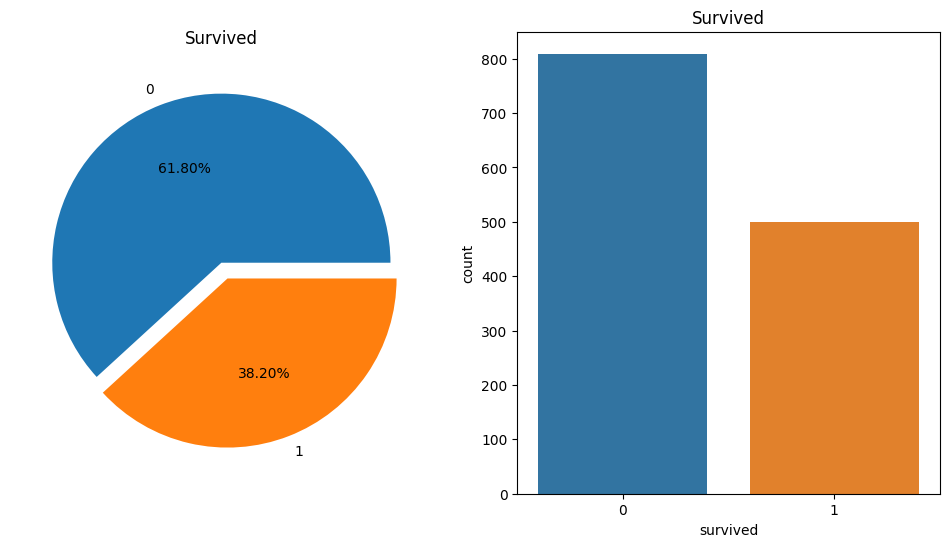

In [5]:
# titanic_features = raw_data.copy()
# titanic_labels = titanic_features.pop('survived')
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

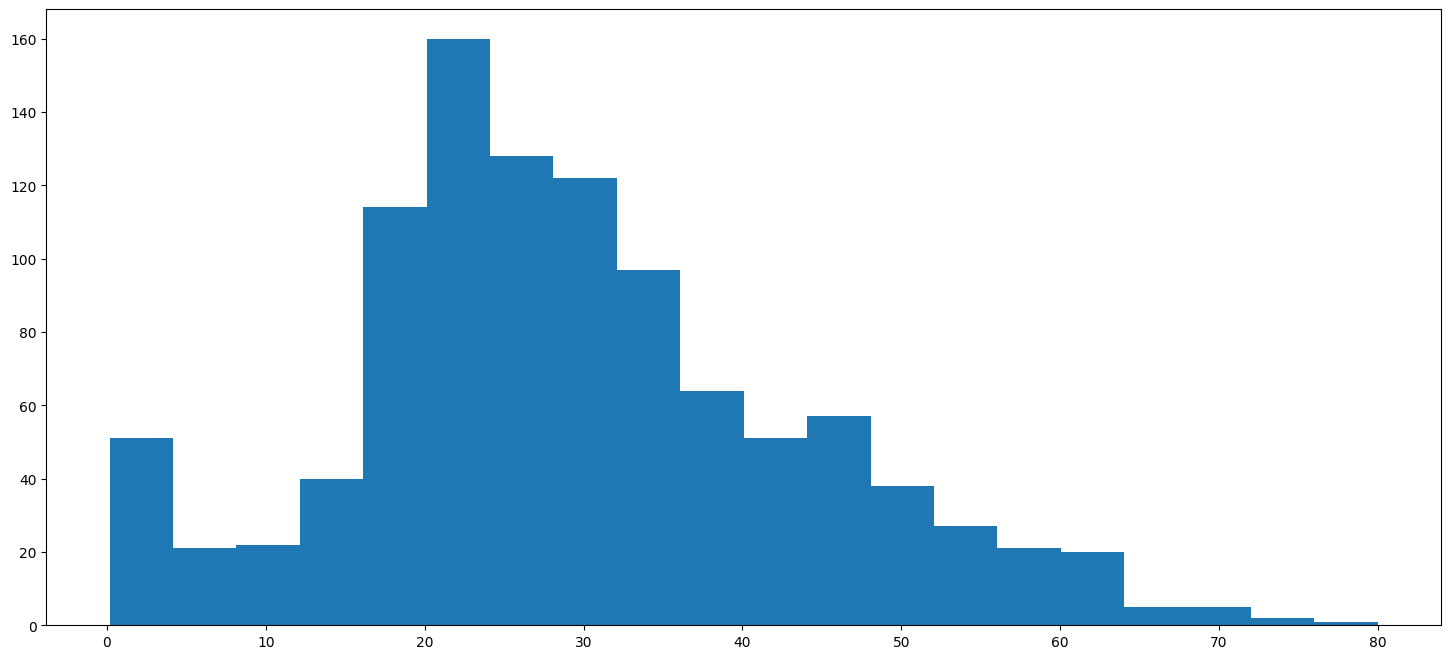

In [6]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False);

In [7]:
numeric_data = raw_data.select_dtypes(include=[np.number])
numeric_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


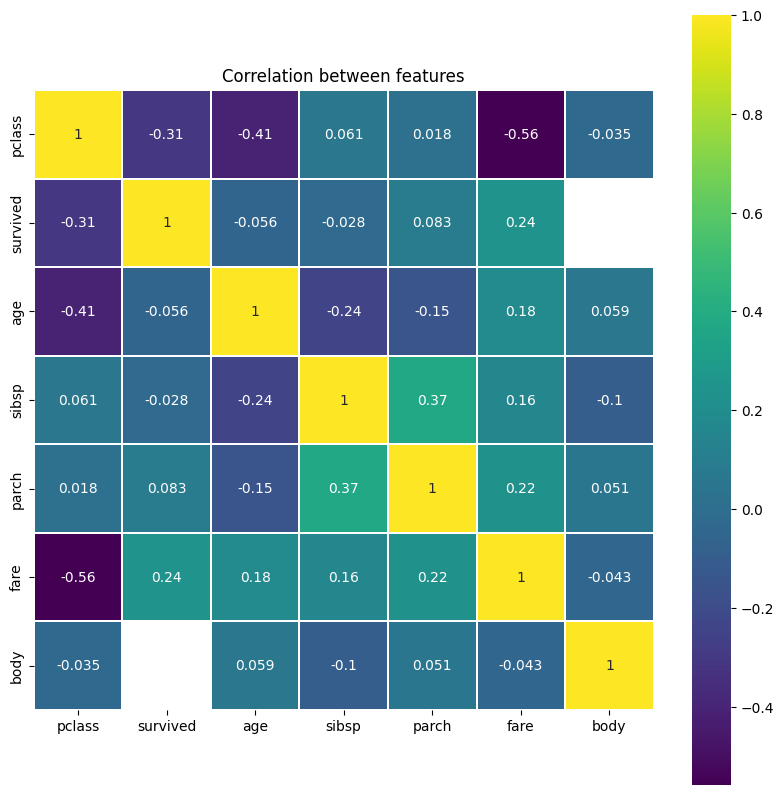

In [8]:
# 문자열 제거 후 진행
numeric_data = raw_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

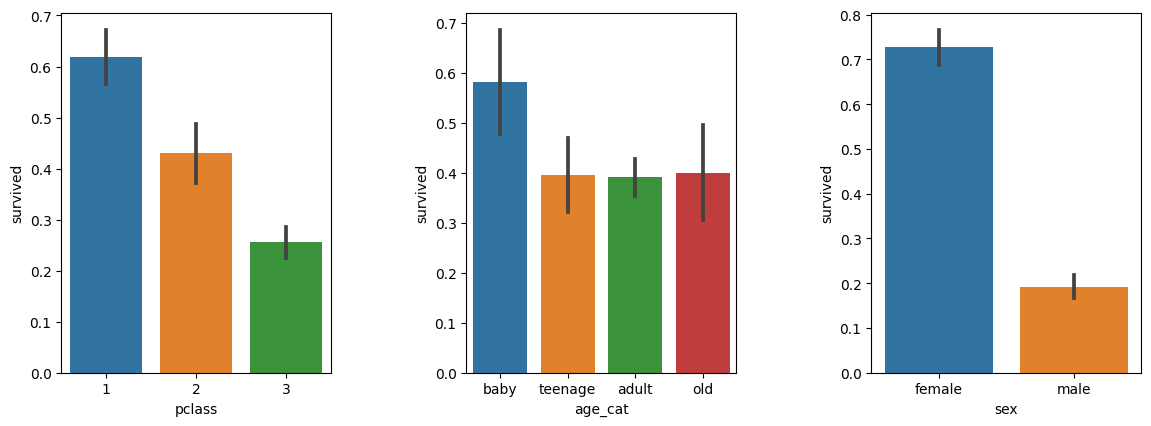

In [9]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 10, 20, 50, 100], 
                            include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=raw_data)
plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=raw_data)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12476\2973452031.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 0) & (raw_data["age"].notnull())],
C:\Users\user\AppData\Local\Temp\ipykernel_12476\2973452031.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 1) & (raw_data["age"].notnull())],


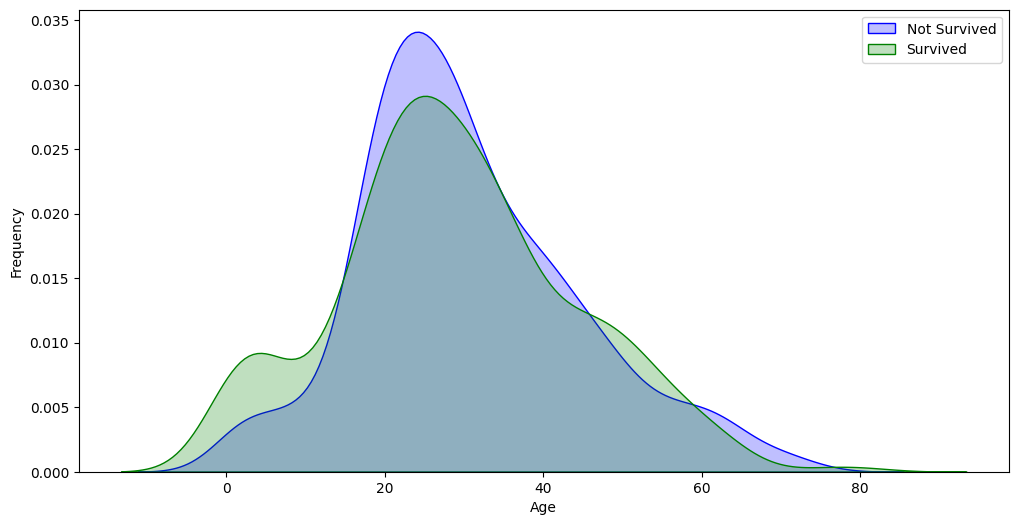

In [10]:
f,ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 0) & (raw_data["age"].notnull())], 
                ax = ax, color="Blue", shade = True)
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 1) & (raw_data["age"].notnull())], 
                ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

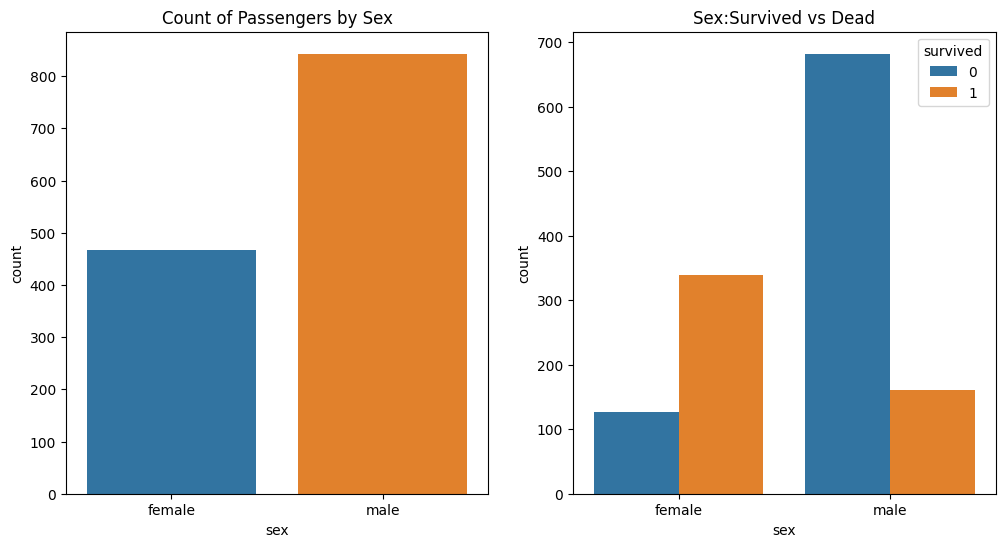

In [11]:
f,ax=plt.subplots(1,2,figsize=(12,6))

sns.countplot(x='sex', data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(x='sex', hue='survived', data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

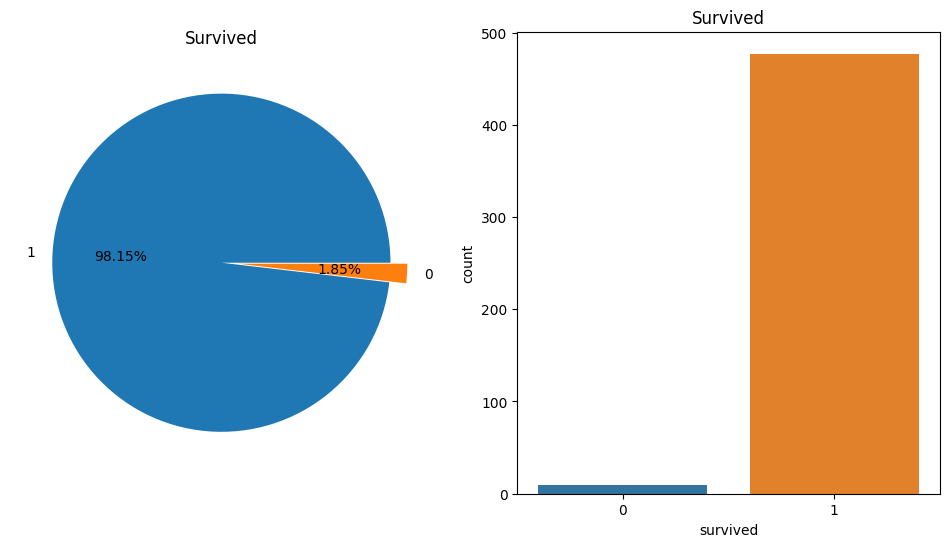

In [12]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [13]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


In [14]:
x_data = raw_data.values[:, [0,3,4,5,6,8]]
y_data = raw_data.values[:, [1]]

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.1, random_state=7)

In [15]:
np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

tensorflow version :  2.8.0
keras version :  2.8.0


In [16]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 255)               1785      
                                                                 
 dense_1 (Dense)             (None, 1)                 256       
                                                                 
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


In [17]:
# !pip install pydot
# !pip install pydot graphviz

In [18]:
import pydot
print(pydot.__version__)

import graphviz
print(graphviz.__version__)

1.4.2
0.20.1


In [19]:
# # 에디터 호환성 X
# from tensorflow import keras
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [20]:
X_train = X_train.astype('float')
y_train = y_train.astype('float')
X_test = X_test.astype('float')
y_test = y_test.astype('float')

In [21]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Epoch 1/500


30/30 [==============================] - 1s 6ms/step - loss: 0.2542 - accuracy: 0.6479 - val_loss: 0.1948 - val_accuracy: 0.7333
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.7000 - val_loss: 0.2000 - val_accuracy: 0.7048
Epoch 3/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.7096 - val_loss: 0.1878 - val_accuracy: 0.7429
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.7479 - val_loss: 0.1738 - val_accuracy: 0.8000
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.7574 - val_loss: 0.1994 - val_accuracy: 0.6952
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.7723 - val_loss: 0.1560 - val_accuracy: 0.8095
Epoch 7/500
30/30 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.7755 - val_loss: 0.1596 - val_accuracy: 0.7810
Epoch 8/500
30/30 [======

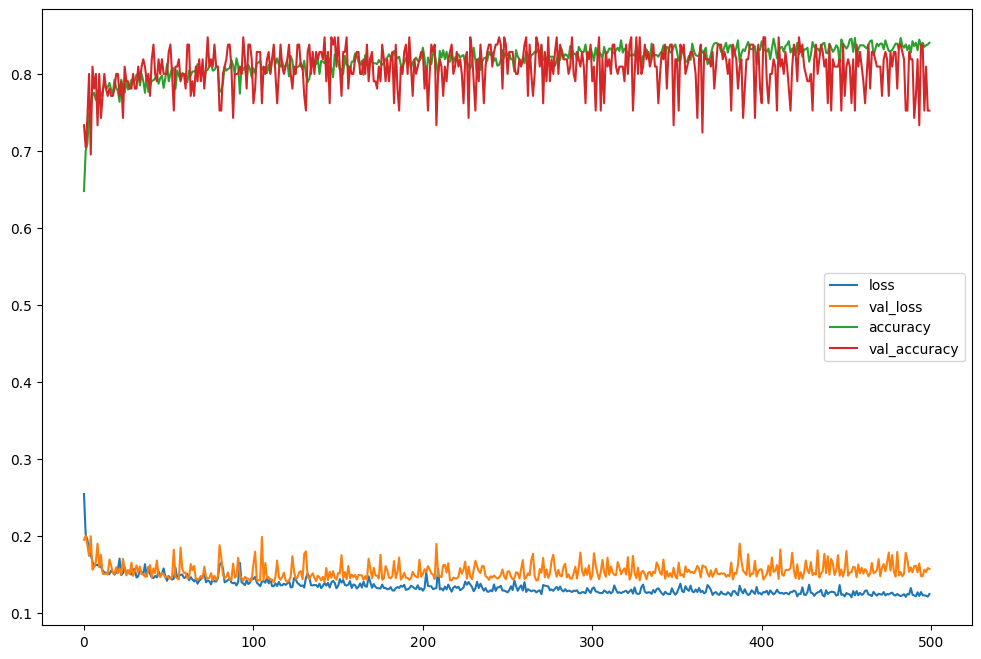

In [22]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

In [23]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6)

In [24]:
model.predict(dicaprio)

array([[0.19129938]], dtype=float32)

In [25]:
model.predict(winslet)

array([[0.99999225]], dtype=float32)

In [27]:
## 오차행렬에 들어갈 예측값
predict_y=model.predict(X_test)
predict_y[predict_y>0.5]=1
predict_y[predict_y<=0.5]=0

real_y=y_test.copy()

In [28]:
# 오차행렬표임 (교재 388쪽의 하단내용)
import pandas as pd
from sklearn.metrics import confusion_matrix
conMatrix=confusion_matrix(real_y, predict_y)
conMatrix

array([[50, 12],
       [14, 29]], dtype=int64)

In [29]:
# 오차행렬표를 데이터프레임으로 변환 (rywo 388쪽 가장하단)
# 오차행렬표를 데이터프레임으로 작업하지 않고, 차트로 보여주는 모듈도 있음.
cnt=len(conMatrix)
pd.DataFrame(conMatrix, 
                index=['true_%d' % i for i in range(cnt)],
                columns=['pred_%d' % i for i in range(cnt)] )

,pred_0,pred_1
true_0,50,12
true_1,14,29


Text(8.222222222222223, 0.5, 'true label')

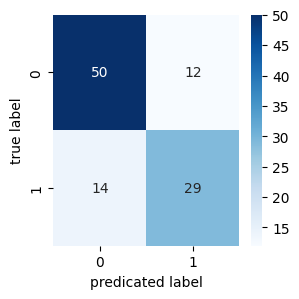

In [30]:
# 오차행렬표를 차트로 보여주는 작업_혼돈행렬
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(conMatrix,annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicated label')
plt.ylabel('true label')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(real_y, predict_y))

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79        62
         1.0       0.71      0.67      0.69        43

    accuracy                           0.75       105
   macro avg       0.74      0.74      0.74       105
weighted avg       0.75      0.75      0.75       105

